# Unidades no Astropy

Astropy já tem as principais constantes catalogadas com unidades e outras informações relevantes.

O link do manual é: http://docs.astropy.org/en/stable/constants/

Neste link estão especificadas as constantes e suas unidades.

No astropy são definidas quantidades, que são objetos que tem valores com suas unidades associadas. 

Abaixo um exemplo de como chamar o modulo de constantes:


In [25]:
import astropy.units as u                   # para importar o módulo de unidades
from astropy.constants import G, h, k_B     # importando algumas constantes

# o que está contido nas constantes
print G
print ''

# podemos também imprimir partes específicas da constante
print G.name, G.value, G.unit

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Uncertainty  = 8e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2010

Gravitational constant 6.67384e-11 m3 / (kg s2)


Note que as constantes são quantidades do astropy pois possuem unidades. Podemos converter as constantes para outros sistemas de unidades com

In [26]:
print G.cgs

6.67384e-08 cm3 / (g s2)


In [27]:
print G.si

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Uncertainty  = 8e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2010


In [28]:
print 20*G  #fazendo contas simples com as constantes

1.334768e-09 m3 / (kg s2)


Como as constantes tem nomes simples pode ser interessante utiliza-las usando o nome do módulo para evitar conflitos com nomes de variáveis. Veja abaixo como fica o exemplo anterior com essa mudança.

In [29]:
from astropy import constants as const

# o que está contido nas constantes
print const.G
print ''

# podemos também imprimir partes específicas da constante
print const.G.name, const.G.value, const.G.unit

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Uncertainty  = 8e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2010

Gravitational constant 6.67384e-11 m3 / (kg s2)


# Calculando o alcance de um projétil

Para ilustrar algumas funções do astropy vamos calcular o alcance de um lançamento de projétil. Da mecanica sabemos que um projétil lançado na superfície da Terra tem o seguinte alcance:

\begin{equation}
x_{max}=\frac{v_0^2.sen(2\theta)}{g}
\end{equation}

No exemplo abaixo começamos pela definição da aceleração da gravidade, obtida a partir das constantes do astropy. Posteriormente definimos as condições inicias usando a definição de unidades e por fim realizamos o cálculo.

In [102]:
# obtendo a aceleração gravitacional
g = (const.G*const.M_earth)/const.R_earth**2

v0 = 10*u.m/u.s

# angulo de lançamento
theta = 30.*u.degree   

#convertendo para radianos
theta_rad = theta.to(u.radian)

print 'Alcance: ', v0**2*np.sin(2.0*theta_rad)/g

Alcance:  8.83614093953 m


note que quando um angulo é definido através de uma quantidade do astropy, as funções trigonométricas do numpy calculam de forma correta mesmo quando o valor é definido em graus

In [104]:
print np.sin(30.*u.degree)    # valor correto do seno
print np.sin(30.)             # valor incorreto do seno


0.5
-0.988031624093


A definição de uma quantidade pode ser feita em um vetor da mesma maneira que em uma variável simples

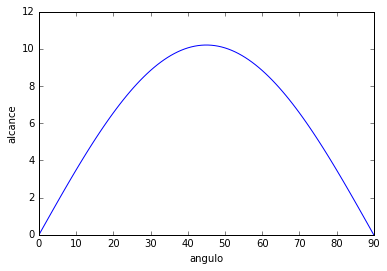

In [111]:
# obtendo a aceleração gravitacional
g = (const.G*const.M_earth)/const.R_earth**2

v0 = 10*u.m/u.s

# criando o vetor angulo de lançamento e definindo sua unidade
theta = np.linspace(0,90.,100)*u.degree   

#convertendo para radianos
theta_rad = theta.to(u.radian)

#calculando o alcance
alc = v0**2*np.sin(2.0*theta_rad)/g

plt.plot(theta,alc)
plt.xlabel('angulo')
plt.ylabel('alcance')

# Massa de uma galáxia: usando astropy units

Neste exemplo, vamos calcular a massa de uma galáxia hipotética. A massa de uma galáxia é uma das quantidades mais importantes para podermos fazer um apropriado estudo das mesmas. Esta quantidade é determinada a partir das medidas de velocidades de suas estrelas e gás interestelar. Considerando uma galáxia elíptica, por exemplo, que se encontra em equilíbrio, temos que $2T+U=0$, sendo $T$ a energia cinética e $U$ a energia potencial.
Devido a baixa velocidade de rotação destas galáxias, podemos escrever a $T$ como:


\begin{equation}
T=\frac{Mv^2}{2}
\end{equation}
e a energia potencial é dada por:


\begin{equation}
U=-\frac{GM^2}{2R}
\end{equation}


Deste modo temos que a massa da galáxia pode ser obtida pela seguinte expressão:


\begin{equation}
M=\frac{2v^2R}{G}
\end{equation}

para este exemplo assumimos que a galáxia tem um raio projetado no céu de $r=29~pc$ considerando a distancia da galáxia. Para usar este valor no astropy com suas unidades corretamente precisamos definir uma Quantidade. Para cria o objeto quantidade que queremos basta multiplicar seu valor numérico pela unidade adequada:

In [59]:
Reff = 29 * u.pc   # definindo a quantidade Reff

print Reff

29.0 pc


In [60]:
# maneira alternativa de definir uma quantidade

Reff = u.Quantity(29, unit=u.pc)

print Reff

29.0 pc


depois de definida a quantidade se pode acessar o valor e a unidade através de:


In [61]:
print 'O raio efetivo é: ', Reff.value
print 'as unidades são: ', Reff.unit

O raio efetivo é:  29.0
as unidades são:  pc


Tendo definido a quantidade de forma adequada, o astropy permite que mudanças de unidades sejam feitas de maneira bem tranquila. Podemos também ver quais são as unidades equivalentes para uma dada quantidade o que pode ajudar na conversão.

In [62]:
u.m.find_equivalent_units()   # mostrar unidades equivalentes do metro

  Primary name | Unit definition | Aliases                         
[
  AU           | 1.49598e+11 m   | au, astronomical_unit            ,
  Angstrom     | 1e-10 m         | AA, angstrom                     ,
  cm           | 0.01 m          | centimeter                       ,
  earthRad     | 6.37814e+06 m   | R_earth, Rearth                  ,
  jupiterRad   | 7.1492e+07 m    | R_jup, Rjup, R_jupiter, Rjupiter ,
  lyr          | 9.46073e+15 m   | lightyear                        ,
  m            | irreducible     | meter                            ,
  micron       | 1e-06 m         |                                  ,
  pc           | 3.08568e+16 m   | parsec                           ,
  solRad       | 6.95508e+08 m   | R_sun, Rsun                      ,
]

In [63]:
# para converter as unidades a sintaxe é:

print Reff.to(u.AU)   # convertendo para unidades astronomicas

print Reff.to(u.micron)   # convertendo para micron

print Reff.to(u.m)

5981679.38112 AU
8.94846498625e+23 micron
8.94846498625e+17 m


Para calcular a massa precisamos também da dispersão de velocidades medida na galáxia. Para definir esta quantidade usamos outra funcionalidade interessante do astropy, a combinação de unidade. Para mostrar a flexibilidade do astropy vamos mostrar essa funcionalidade em um vetor de onde obteremos a média e o desvio padrão da distribuição de velocidades.

In [64]:
import numpy as np                         #importando o modulo para lidar com vetores

v_mean = 206.                              # definimos a média da distribuição
v_sig = 4.3                                # definimos o desvio padrão da distribuição

v = np.random.normal(v_mean, v_sig, 500)   # gera um vetor de 500 valores aleatórios de velocidade 

# para transformar esse vetor em uma quantidade do astropy usamos a combinação de unidades

v = v*u.km/u.s

print 'Máximo de v: ', np.max(v)
print 'Mínimo de v: ', np.min(v)
print 'Média de v: ', np.mean(v)

# note que o print já mostra as unidades corretamente

Máximo de v:  221.07367414 km / s
Mínimo de v:  196.386120888 km / s
Média de v:  206.345899678 km / s


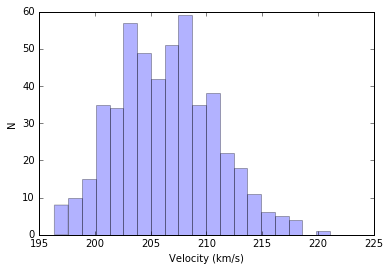

In [65]:
# podemos plotar um histograma para visualizar a distribuição de valores

import matplotlib.pyplot as plt     # importanto o modulo de gráficos

# fazer os graficos na propria pagina
%matplotlib inline                  

plt.hist(v, bins=20, alpha=0.3)
plt.xlabel("Velocity (km/s)")
plt.ylabel("N")

O astropy é feito de modo a permitir operações usuais com as quantidades assim como uso das funções matemáticas do numpy. Além disso, assim como anteriormente podemos mudar as unidades de maneira simples:

In [66]:
v_med = np.mean(v)

v_sig = np.std(v)


print v_med, '+/-', v_sig

print v_med.to(u.m/u.s)

206.345899678 km / s +/- 4.42387800811 km / s
206345.899678 m / s


Com isso podemos agora calcular a massa da galáxia com a equação mostrada acima:
    

In [67]:
M = 4*v_sig**2*Reff/const.G
print 'Massa da galáxia: ',M

Massa da galáxia:  3.40164104797e+13 kg km2 pc / m3


In [68]:
# se digitamos apenas M o notebook formata a saida

M

<Quantity 34016410479659.83 kg km2 pc / m3>

Repare no entanto que as unidades não estão simplificadas. Para fazer a simplificação o astropy dispõe do metodo decompose:

In [69]:
print 'Massa da galáxia: '
M.decompose()

Massa da galáxia: 


<Quantity 1.0496367521907197e+36 kg>

podemos também expressar a massa em termos de massas solares ou mesmo outros sistemas:

In [70]:
print 'em massas solares: ',M.to(u.Msun)
print ' no sitema SI: ', M.si
print 'no sistema cgs: ', M.cgs

# impressão formatada do notebook
M.to(u.Msun)

em massas solares:  527694.310085 solMass
 no sitema SI:  1.04963675219e+36 kg
no sistema cgs:  1.04963675219e+39 g


<Quantity 527694.3100853249 solMass>

Alcance:  8.83614093953 m


In [101]:
np.sin(30.*np.pi/180.)


0.49999999999999994

In [84]:
(45.*u.degree).to(u.radian) 

<Quantity 0.7853981633974483 rad>